<a href="https://colab.research.google.com/github/thedataninja1786/Data-Science/blob/main/ARIMA_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
'''Import files and read data'''
import matplotlib.pyplot as plt
import random

with open('/content/drive/MyDrive/monthly-sunspots.txt','r') as f:
  data = f.readlines()

dates = []
values = []

for row in data[1:]:
  element  = row.split()[0]
  dates.append(element.split(',')[0].strip('"'))
  values.append(float(element.split(',')[1].strip("''")))

In [4]:
#We need a function that generates regressions based on the number of the desired lags
#Hence we need a function that generates the lags lol

def AutoRegression(data:list,lags:int, lr:float):
  random.seed(0)
  '''Add an extra 2 on the number of lags to compensate for creating the Y dataset also and for the fact that the index starts at position 1'''
  lags = lags + 2 
  dataset = []
  for z,j in enumerate(range(lags,1,-1)):
    z = z + 1 
    dummy = []
    for i in range(z,len(values) - j):
      dummy.append(values[i])
    dataset.append(dummy)

  Y = dataset[-1]
  X = dataset[:len(dataset)-1]
  XT = [[X[j][i] for j in range(len(X))] for i in range(len(X[0]))] #transpose the X dataset

  weights = [random.random() for x in range(len(XT[0]))]
  bias = random.random() 

  for _ in range(1500): #set number of iterations 1500 by default 
    predictions = []
 
    for x,y in zip(XT,Y):
      y_hat = 0 
      for element,weight in zip(x,weights):
        y_hat += (element * weight)
      y_hat = y_hat + bias 
      predictions.append(round(y_hat))
      error = y_hat - y

      for i,el in enumerate(x):
        dw = (1 / (10 * len(XT))) * (el * (error)) #derivative of each weight  
        weights[i] -= dw * lr    #update weights 
      
      db = (1 / len(XT)) * (y_hat - y) #derivative of bias 
      bias -= db * lr #update bias 

  return weights, predictions, Y


In [5]:
def diff(data:list,number:int):
  full = []
  def differencing(data):
    differenced =[data[1]]
    for i in range(1,len(data)):
      differenced.append(data[i] - data[i-1])
    return differenced 

  full = [differencing(data)]
  for i in range(number):
    full.append(differencing(full[i]))
  return full[-1]


In [6]:
def MA(predictions:list,Y:list,window:int):
  residuals = [round((y - y_hat),2) for y,y_hat in zip(predictions,Y)]
  output = [0 for i in range(window)] #so the length becomes the same as the prediction length 
  for i in range(0,len(residuals)-window):
    x = 0 
    for j in range(i,i+window):
      x+= residuals[j]
    output.append(x / window)
  return output


In [7]:
for d in range(2):
  error = 0 
  data = diff(data = values, number = d)

  for p in range(1,4):
    AR = AutoRegression(data, lags = p, lr = 0.001)
    AR_predictions = AR[1]
    Y = AR[2]
  
    for q in range(1,4):
      ma = MA(AR_predictions, Y , window= q)
      preds = [(ar_pred + ma_pred) for ar_pred,ma_pred in zip(AR_predictions, ma)]
      
      for pred, y in zip(preds,Y):
        error += (y - pred) ** 2 
      error = (error / len(preds)) ** 0.5 
      print(f'ARIMA {p,d,q} with RMSE of {round(error,2)}')



ARIMA (1, 0, 1) with RMSE of 20.43
ARIMA (1, 0, 2) with RMSE of 17.1
ARIMA (1, 0, 3) with RMSE of 16.58
ARIMA (2, 0, 1) with RMSE of 22.31
ARIMA (2, 0, 2) with RMSE of 17.85
ARIMA (2, 0, 3) with RMSE of 16.66
ARIMA (3, 0, 1) with RMSE of 22.23
ARIMA (3, 0, 2) with RMSE of 18.9
ARIMA (3, 0, 3) with RMSE of 17.17
ARIMA (1, 1, 1) with RMSE of 20.43
ARIMA (1, 1, 2) with RMSE of 17.1
ARIMA (1, 1, 3) with RMSE of 16.58
ARIMA (2, 1, 1) with RMSE of 22.31
ARIMA (2, 1, 2) with RMSE of 17.85
ARIMA (2, 1, 3) with RMSE of 16.66
ARIMA (3, 1, 1) with RMSE of 22.23
ARIMA (3, 1, 2) with RMSE of 18.9
ARIMA (3, 1, 3) with RMSE of 17.17


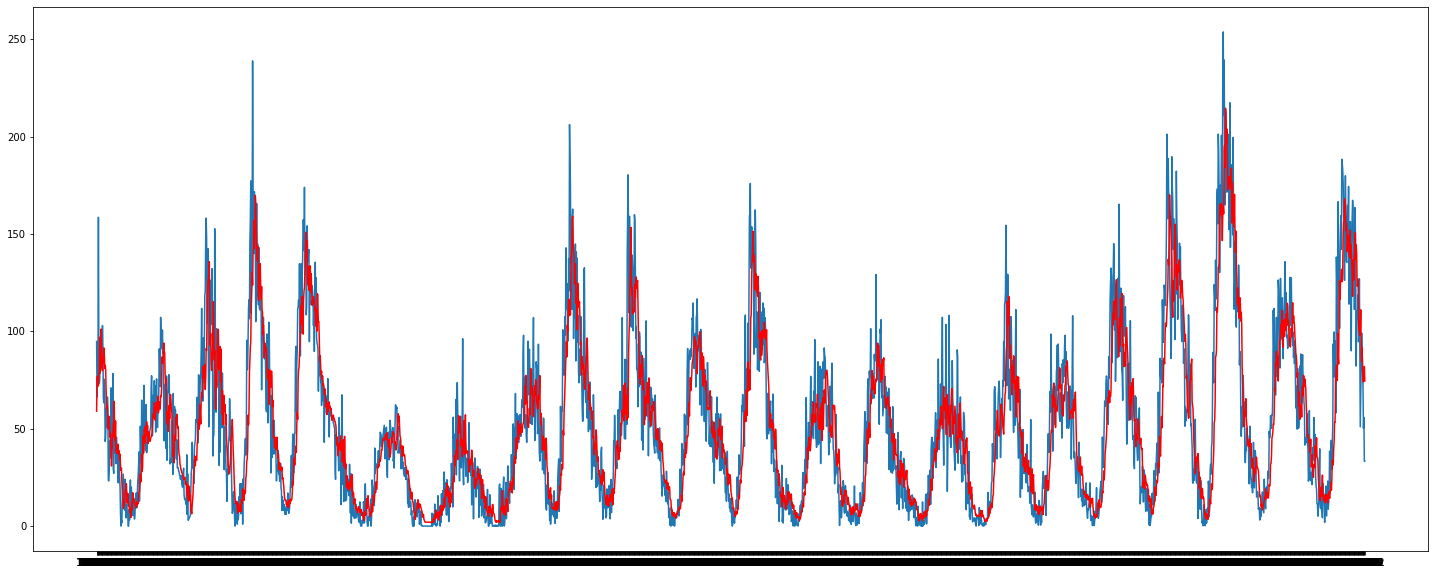

In [22]:
plt.plot(dates[6:],values[6:])
plt.plot(dates[6:], preds, color = 'red')
plt.rcParams["figure.figsize"] = (15, 7)
plt.show()